# 1. Importing Necessary Libraries 📚

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# 2. Loading Dataset 📊

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: >

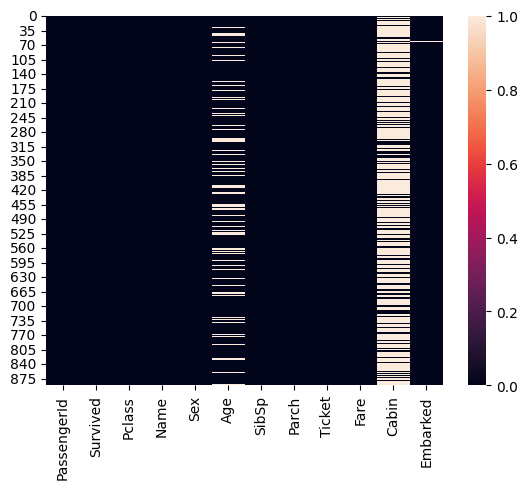

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Observation
- There are a total of 891 passengers in our training set.
- The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
- The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
- The Embarked feature is missing 0.22% of its values, which should be relatively harmless.
- Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- Categorical Features: Survived, Sex, Embarked, Pclass
- Alphanumeric Features: Ticket, Cabin
- 'Cabin' column have too many null values and it is not feasible to impute it
- wee see that 'Embarked' column is showing only first alphabet of 'embarked_town'

In [8]:
#replacing the missing values in the Embarked feature
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = df[df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df[df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df[df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
646
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


# 3. Exploratory Data Analysis 📉

# (A) Sex

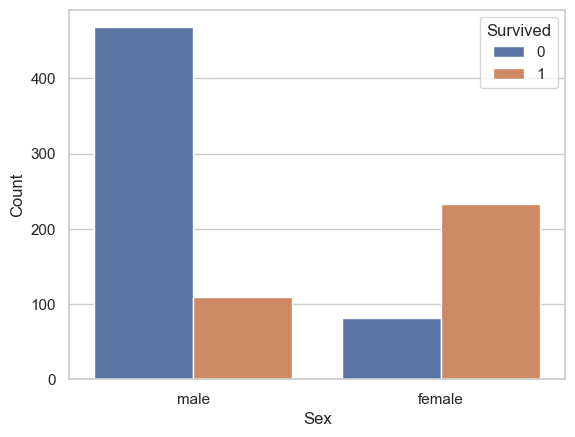

In [9]:
sns.set(style="whitegrid")
sns.countplot(x="Sex", hue="Survived", data=df)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

- we clearly see that death of male is more in comparision to female
- As predicted, females have a much higher chance of survival than males. The Sex feature is essential in our predictions
- Percentage of females who survived: 74.20382165605095
- Percentage of males who survived: 18.890814558058924

# (B) Embarked

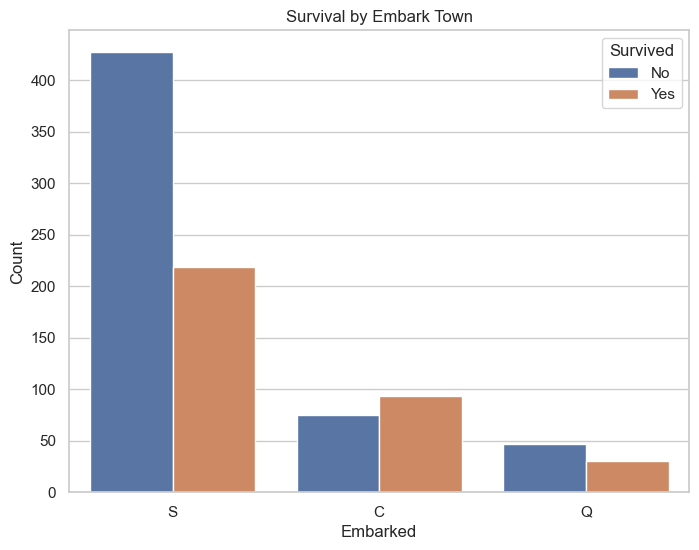

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Survival by Embark Town")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

- We clearly see that many peoples started their journey from Southampton
- people startes from Southampton have more number of deaths

# (c) Pclass 

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


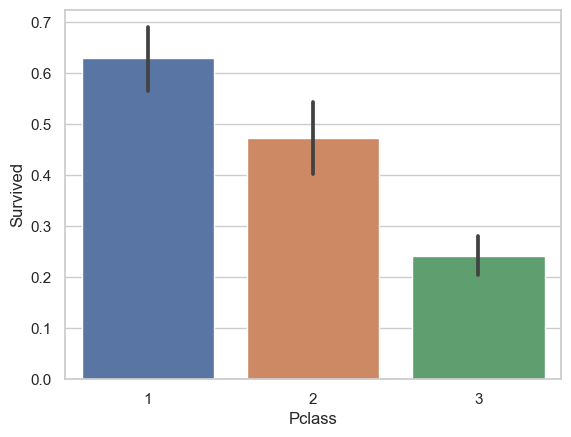

In [11]:
sns.barplot(x="Pclass", y="Survived", data=df)

print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

# (d) SibSp

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


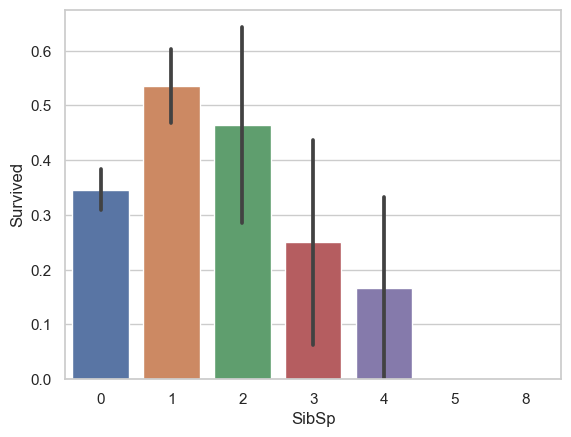

In [12]:
sns.barplot(x="SibSp", y="Survived", data=df)

print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

# (e) Parch

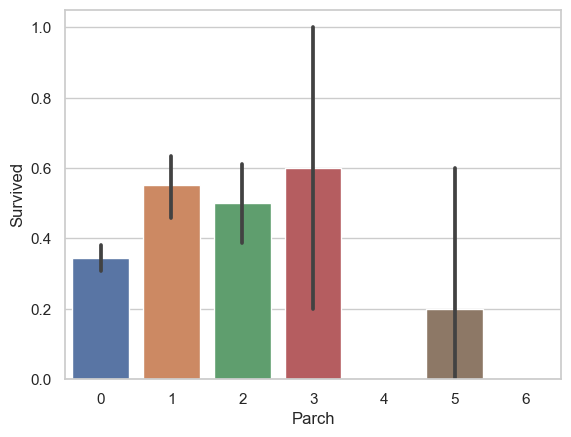

In [13]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=df)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

# (f) Age

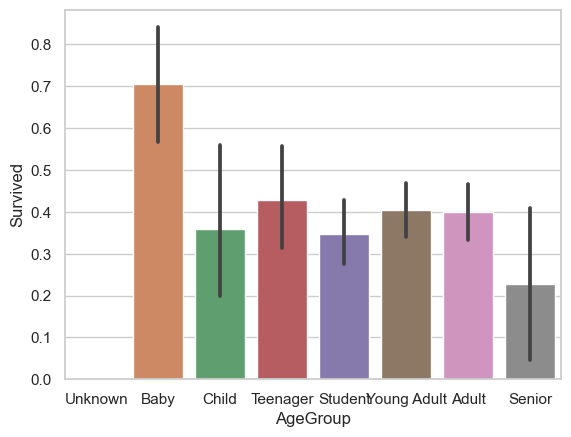

In [14]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.show()

# 4. Data Preprocessing (Cleaning) 🧹

In [15]:
df.dropna(how = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult


# Cabin Feature

In [16]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
df = df.drop(['Cabin','AgeGroup'], axis = 1)

# Ticket Feature

In [17]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
df = df.drop(['Ticket'], axis = 1)

# Age Feature

# (A) Handling Missing Values of Age Column

In [18]:
mean = df["Age"].mean()
std = df["Age"].std()
print(mean)
print(std)

29.69911764705882
14.526497332334042


In [19]:
rand_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = df["Age"].copy()

age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Name Feature
We can drop the name feature now that we've extracted the titles.
drop tilte

In [20]:
#drop the name feature since it contains no more useful information.
df = df.drop(['Name'], axis = 1)


# Sex Feature

In [21]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


# Embarked Feature

In [22]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


# PassengerId

In [23]:
#drop PassengerId
df = df.drop(['PassengerId'],axis = 1)

<AxesSubplot: >

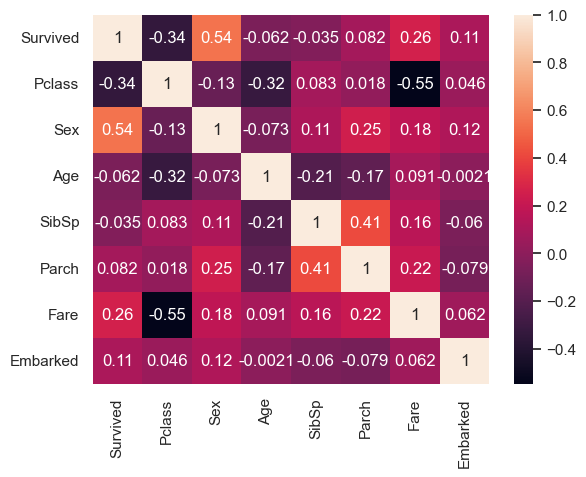

In [24]:
sns.heatmap(df.corr(),annot = True)

# 5. Building Machine Learning Model 🤖¶

In [25]:
X = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [26]:
#train-test-split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

# (a) DecisionTree Classifier (Prepruning And Hyperparameter Tuning For Huge Data)

In [27]:
treeclassifier = DecisionTreeClassifier()

In [28]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
## Prediction
y_pred=treeclassifier.predict(X_test)

In [30]:
dtc_accuracy = accuracy_score(y_pred,y_test)
dtc_accuracy

0.776536312849162

In [31]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [32]:
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [33]:
## Train the data
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [34]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [35]:
y_pred=clf.predict(X_test)

In [36]:
dtc_accuracy = accuracy_score(y_pred,y_test)*100
print("Test Accuracy",dtc_accuracy)

Test Accuracy 79.3296089385475


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       117
           1       0.93      0.44      0.59        62

    accuracy                           0.79       179
   macro avg       0.85      0.71      0.73       179
weighted avg       0.82      0.79      0.77       179



In [38]:
print(confusion_matrix(y_test,y_pred))

[[115   2]
 [ 35  27]]


In [39]:
y_pred=clf.predict(X_train)

In [40]:
print("train Accuracy",accuracy_score(y_pred,y_train)*100)

train Accuracy 77.52808988764045


# (b) Logistic Regression

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

LogisticRegression()

In [43]:
## prediction
y_pred = lr.predict(X_test)

In [44]:
lr_accuracy = accuracy_score(y_pred,y_test)*100

In [45]:
print(confusion_matrix(y_pred,y_test))
print("test accuracy",accuracy_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))

[[101  17]
 [ 16  45]]
test accuracy 81.56424581005587
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       118
           1       0.73      0.74      0.73        61

    accuracy                           0.82       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [46]:
#parameters={'penalty':('l1','l2','elasticnet',None),'C':[1,10,20]}
parameters = {
    'penalty': ['l1', 'l2','elasticnet',None],         # Regularization type (L1 or L2)
    'C': [0.001, 0.01, 0.1, 1, 10,20],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'], # Optimization algorithm
    'max_iter': [100, 200, 300],      # Maximum number of iterations
}


In [47]:
clf=GridSearchCV(lr,param_grid=parameters,cv=5,scoring='accuracy')

In [48]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [49]:
clf.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [66]:
## Prediction
y_pred=clf.predict(X_test)
lr_accuracy = accuracy_score(y_pred,y_test)*100
print(confusion_matrix(y_pred,y_test))
print("test accuracy ",accuracy_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))

[[91 28]
 [26 34]]
test accuracy  69.83240223463687
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       119
           1       0.55      0.57      0.56        60

    accuracy                           0.70       179
   macro avg       0.66      0.67      0.66       179
weighted avg       0.70      0.70      0.70       179



In [51]:
## Prediction
y_pred=clf.predict(X_train)
print("train Accuracy",accuracy_score(y_pred,y_train)*100)

train Accuracy 79.7752808988764


# (C) Random Forest Classifier 🌳🌳🌳🌳

In [52]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
rfc_y_pred = clf.predict(X_test)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("test accuracy=",rfc_accuracy)
rfc_y_pred= clf.predict(X_train)
print("train accuracy=",accuracy_score(y_train,rfc_y_pred) * 100)

test accuracy= 81.56424581005587
train accuracy= 99.01685393258427


# (D) K-Neighbor Classifier

In [53]:
clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)
knc_y_pred = clf.predict(X_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100
print("test accuracy=",knc_accuracy)
knc_y_pred = clf.predict(X_train)
print("train accuracy=",accuracy_score(y_train,knc_y_pred) * 100)

test accuracy= 69.83240223463687
train accuracy= 77.10674157303372


# (E) Support Vector Classifier

In [54]:
svc = SVC(kernel = 'linear')

In [55]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [56]:
svc.coef_

array([[-0.06233758,  2.06485972, -0.00398827, -0.24821129, -0.09513271,
         0.00323009,  0.02010181]])

In [57]:
## Prediction
y_pred=svc.predict(X_test)

In [58]:
svm_accuracy = accuracy_score(y_test,y_pred)*100
print("test Accuracy",svm_accuracy)

test Accuracy 81.56424581005587


In [59]:
#defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [60]:
random=RandomizedSearchCV(SVC(),param_distributions=param_grid,refit=True,cv=5,verbose=3)

In [61]:
random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.797 total time= 2.3min
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.811 total time= 5.2min
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.739 total time= 1.1min
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.796 total time= 1.2min
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.789 total time= 3.4min
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.748 total time=   7.4s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.818 total time=   1.8s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.768 total time=   1.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.768 total time=   8.5s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.810 total time=   1.4s
[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.755 total time= 2.0min
[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear']},
                   verbose=3)

In [67]:
random.best_params_
# {'kernel': 'linear', 'gamma': 0.1, 'C': 1000}

{'kernel': 'linear', 'gamma': 0.1, 'C': 1000}

In [63]:
## Prediction
y_pred=random.predict(X_test)
svm_accuracy = accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("test Accuracy ",accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       117
           1       0.76      0.71      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

[[103  14]
 [ 18  44]]
test Accuracy  82.12290502793296


In [64]:
## Prediction
y_pred = random.predict(X_train)
print("train accuracy",accuracy_score(y_train,y_pred)*100)

train accuracy 79.35393258426966


# Accuracy of all 5 Classifiers

In [65]:
print("Accuracy of Decision Tree Classifier = ",dtc_accuracy)
print("Accuracy of Logistic Regressor =",lr_accuracy)
print("Accuracy of Random Forest Classifier =",rfc_accuracy)
print("Accuracy of K-Neighbor Classifier =",knc_accuracy)
print("Accuracy of Support Vector Machine Classifier = ",svm_accuracy)

Accuracy of Decision Tree Classifier =  79.3296089385475
Accuracy of Logistic Regressor = 81.56424581005587
Accuracy of Random Forest Classifier = 81.56424581005587
Accuracy of K-Neighbor Classifier = 69.83240223463687
Accuracy of Support Vector Machine Classifier =  82.12290502793296
